## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 한글폰트 사용하기

In [120]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

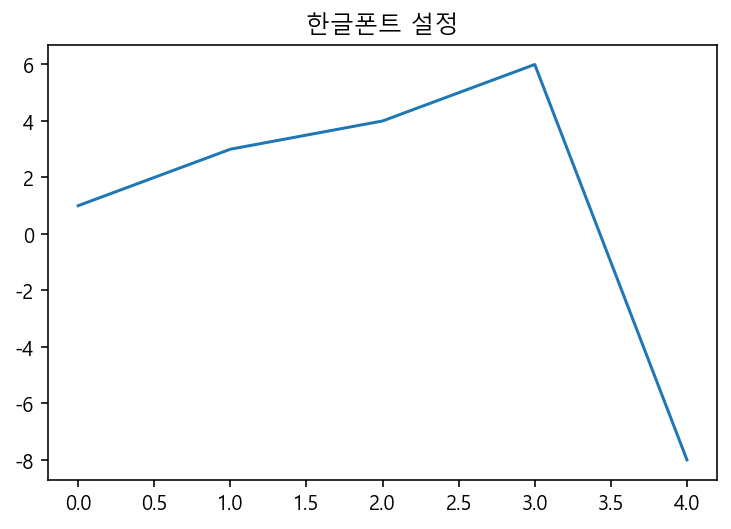

In [121]:
pd.Series([1, 3, 4, 6, -8]).plot(title='한글폰트 설정')

In [122]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터셋 로드

In [124]:
# NHIS_OPEN_GJ_2017.CSV  을 사용합니다. 1000개로 샘플링해서 사용합니다.
# random_state=42 로 항상 같은 샘플이 나오도록 합니다.

df = pd.read_csv('C:/Users/wonho/Downloads/NHIS_OPEN_GJ_2017.csv', encoding='cp949')
df = df.sample(1000, random_state=312)
df.shape

(1000, 34)

In [125]:
# 컬럼이 다 보이게 설정
pd.options.display.max_columns = 34

In [126]:
# 파일 크기를 줄이기 위해 데이터가 숫자로 구성됨
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
592554,2017,592555,1,14,30,170.0,70.0,87.0,0.7,0.9,1.0,1.0,120.0,70.0,109.0,301.0,108.0,75.0,204.0,14.2,1.0,0.9,30.0,31.0,19.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
422127,2017,422128,2,11,41,160.0,65.0,89.0,1.0,0.9,1.0,1.0,110.0,62.0,98.0,187.0,125.0,44.0,118.0,13.1,1.0,0.9,18.0,23.0,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
283767,2017,283768,1,5,11,185.0,80.0,87.0,0.9,1.0,1.0,1.0,124.0,84.0,97.0,140.0,43.0,64.0,67.0,15.4,1.0,0.9,26.0,15.0,16.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
943108,2017,943109,2,13,26,145.0,50.0,76.0,0.9,0.8,1.0,1.0,111.0,65.0,101.0,220.0,66.0,73.0,133.0,13.3,1.0,0.8,29.0,16.0,12.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
111413,2017,111414,2,10,48,155.0,60.0,76.0,0.9,0.8,1.0,1.0,120.0,80.0,92.0,237.0,68.0,83.0,140.0,13.0,1.0,0.6,21.0,20.0,19.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 데이터 전처리

### 결측치 채우기
* 의미있는 값으로 채우면 분류 예측 결과가 더 좋아집니다.

In [127]:
# replace 를 통해 결측치를 0 으로 채워주세요.
# 그리고 결측치가 다 채워졌는지 확인합니다.

df.isnull().sum()

기준년도               0
가입자일련번호            0
성별코드               0
연령대코드(5세단위)        0
시도코드               0
신장(5Cm단위)          0
체중(5Kg 단위)         0
허리둘레               0
시력(좌)              0
시력(우)              0
청력(좌)              1
청력(우)              1
수축기혈압              0
이완기혈압              0
식전혈당(공복혈당)         0
총콜레스테롤             0
트리글리세라이드           0
HDL콜레스테롤           0
LDL콜레스테롤           2
혈색소                0
요단백                2
혈청크레아티닌            0
(혈청지오티)AST         0
(혈청지오티)ALT         0
감마지티피              0
흡연상태               0
음주여부               1
구강검진 수검여부          0
치아우식증유무         1000
결손치유무           1000
치아마모증유무         1000
제3대구치(사랑니)이상    1000
치석               607
데이터공개일자            0
dtype: int64

In [128]:
# df.fillna(0)
df = df.replace(np.nan, 0)
df.isnull().sum()

기준년도            0
가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진 수검여부       0
치아우식증유무         0
결손치유무           0
치아마모증유무         0
제3대구치(사랑니)이상    0
치석              0
데이터공개일자         0
dtype: int64

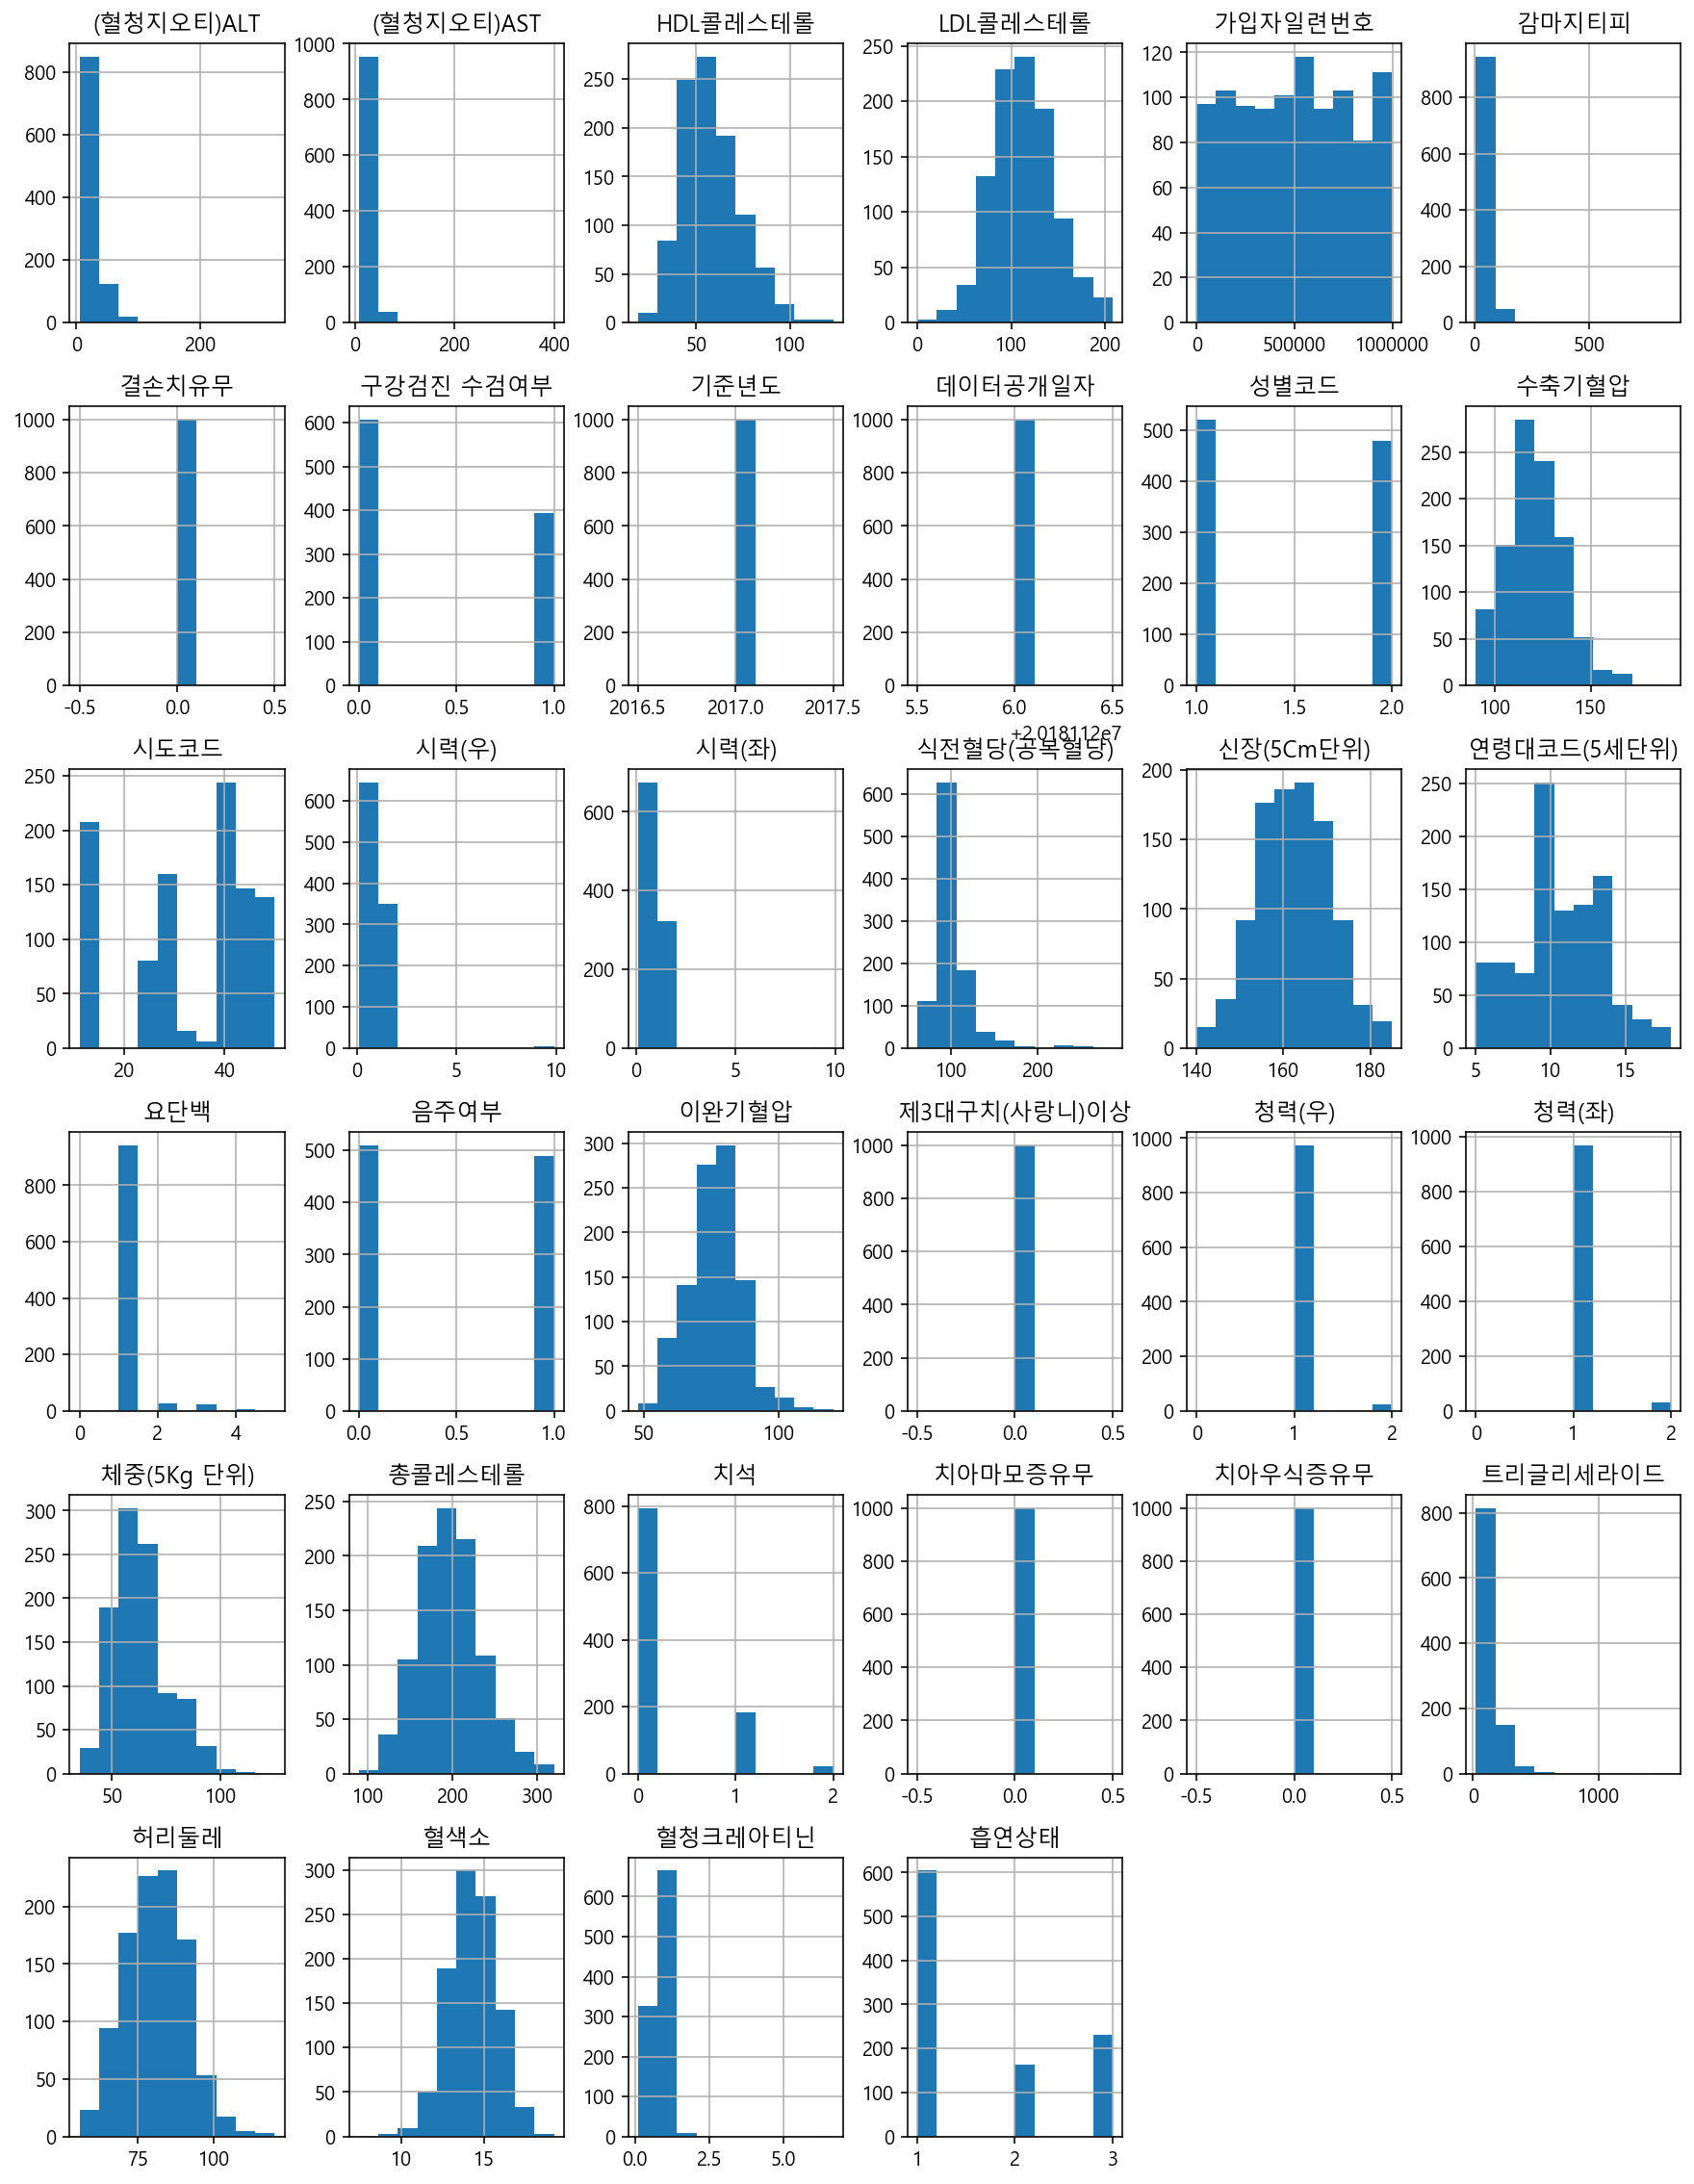

In [129]:
h = df.hist(figsize=(15,20))

In [378]:
corr = df.corr()
corr.loc[corr['음주여부']> 0.3, '음주여부'] 

신장(5Cm단위)    0.348783
혈색소          0.322538
흡연상태         0.350343
음주여부         1.000000
Name: 음주여부, dtype: float64

## 학습, 예측 데이터셋 나누기

In [130]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
# 학습 데이터가 많을수록 결과의 성능이 좋아진다고 볼 수 있다.
split_count = int(df.shape[0] * 0.8)
split_count

800

In [131]:
# 파이썬 기초에서 다룬 슬라이싱을 통해 데이터를 나눕니다.
# train, test 라는 변수에 담습니다.

train = df[:split_count]
test = df[split_count:]

train.shape, test.shape

((800, 34), (200, 34))

## 학습, 예측에 사용할 컬럼

In [132]:
train.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [133]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names

['성별코드',
 '연령대코드(5세단위)',
 '허리둘레',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '감마지티피']

In [195]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 따로 가져옵니다.
# 모든 컬럼을 다 사용하지 않습니다. 신호와 소음을 가려냅니다.
feature_names = ['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '구강검진 수검여부',
       '치석']
feature_names

['성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '구강검진 수검여부',
 '치석']

## 정답값이자 예측해야 될 값

In [196]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = '음주여부'
label_name

'음주여부'

## 학습, 예측 데이터셋 만들기

In [197]:
# 학습 세트 만들기 예) 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(800, 26)


,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
592554,1,14,30,170.0,70.0,87.0,0.7,0.9,1.0,1.0,120.0,70.0,109.0,301.0,108.0,75.0,204.0,14.2,1.0,0.9,30.0,31.0,19.0,1.0,0,0.0
422127,2,11,41,160.0,65.0,89.0,1.0,0.9,1.0,1.0,110.0,62.0,98.0,187.0,125.0,44.0,118.0,13.1,1.0,0.9,18.0,23.0,23.0,1.0,0,0.0
283767,1,5,11,185.0,80.0,87.0,0.9,1.0,1.0,1.0,124.0,84.0,97.0,140.0,43.0,64.0,67.0,15.4,1.0,0.9,26.0,15.0,16.0,3.0,1,1.0
943108,2,13,26,145.0,50.0,76.0,0.9,0.8,1.0,1.0,111.0,65.0,101.0,220.0,66.0,73.0,133.0,13.3,1.0,0.8,29.0,16.0,12.0,1.0,0,0.0
111413,2,10,48,155.0,60.0,76.0,0.9,0.8,1.0,1.0,120.0,80.0,92.0,237.0,68.0,83.0,140.0,13.0,1.0,0.6,21.0,20.0,19.0,1.0,0,0.0


In [198]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(800,)


592554    1.0
422127    0.0
283767    1.0
943108    0.0
111413    1.0
Name: 음주여부, dtype: float64

In [199]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(200, 26)


,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
164437,2,5,30,155.0,40.0,59.0,0.8,0.8,1.0,1.0,106.0,69.0,93.0,191.0,56.0,72.0,108.0,13.7,1.0,0.7,13.0,8.0,8.0,3.0,1,1.0
643768,2,13,41,145.0,55.0,75.0,0.8,0.7,1.0,1.0,115.0,84.0,95.0,220.0,152.0,50.0,139.0,15.2,1.0,0.6,21.0,24.0,15.0,1.0,0,0.0
678285,2,10,29,155.0,55.0,74.0,1.0,0.8,1.0,1.0,130.0,80.0,106.0,180.0,135.0,49.0,104.0,13.1,1.0,0.6,15.0,11.0,26.0,1.0,0,0.0
355569,2,7,11,165.0,55.0,72.0,1.5,1.5,1.0,1.0,124.0,79.0,101.0,154.0,76.0,57.0,82.0,13.7,1.0,0.9,14.0,9.0,9.0,1.0,0,0.0
657986,1,12,41,170.0,75.0,88.0,0.9,1.2,1.0,1.0,118.0,78.0,169.0,133.0,138.0,53.0,52.0,15.1,3.0,0.9,18.0,35.0,97.0,3.0,0,0.0


In [200]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(200,)


164437    1.0
643768    1.0
678285    0.0
355569    1.0
657986    1.0
Name: 음주여부, dtype: float64

## 머신러닝 알고리즘 가져오기
* [2.3.6 결정 트리의 앙상블 | 텐서 플로우 블로그 (Tensor ≈ Blog)](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-6-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%9D%98-%EC%95%99%EC%83%81%EB%B8%94/)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)

In [201]:
# # DecisionTree 를 사용합니다.

# from sklearn.tree import DecisionTreeClassifier
# # random_state 지정 가능
# model = DecisionTreeClassifier()
# model

* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)

In [232]:
# RandomForest 를 사용합니다.
from sklearn.ensemble import RandomForestClassifier

# n_estimatios : 트리의 갯수
# n_jobs : 사용할 수 있는 CPU 코어의 수
model = RandomForestClassifier(n_estimators=1000,
                               max_depth=8,
                               n_jobs=-1,
                               random_state=42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [322]:
# GradientBoosting 을 사용합니다.
# 랜덤포레스트와 유사하게 앙상블 모델이지만 이전트리의 오차를 보완하는 방식으로 트리를 만듭니다.
# 랜덤포레스트와 달리 무작위성이 없으며 깊지 않은 트리를 많이 만들어 연결하기 때문에 비교적 속도도 빠릅니다.
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=12,
                                   random_state=42)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Grid Search, Random Search
* 하이퍼파라메터 튜닝

In [360]:
# 트리의 깊이
max_depth_list = [5, 7, 9, 11, 13, 15]
# 샘플링할 피처의 비율 (1이면 모두 다 사용합니다.)
max_features_list = [0.5, 0.7, 0.9, 1]

f1_score_list = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        
        score_list = []
        model = RandomForestClassifier(max_depth=max_depth,
                                          max_features=max_features,
                                          random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = f1_score(y_test, predictions)
        score_list.append(max_depth)
        score_list.append(max_features)
        score_list.append(score)
        f1_score_list.append(score_list)
    
f1_score_list

[[5, 0.5, 0.7192118226600985],
 [5, 0.7, 0.712871287128713],
 [5, 0.9, 0.693069306930693],
 [5, 1, 0.68],
 [7, 0.5, 0.7],
 [7, 0.7, 0.6767676767676768],
 [7, 0.9, 0.737864077669903],
 [7, 1, 0.6995073891625615],
 [9, 0.5, 0.702970297029703],
 [9, 0.7, 0.7164179104477612],
 [9, 0.9, 0.714975845410628],
 [9, 1, 0.6990291262135923],
 [11, 0.5, 0.7106598984771573],
 [11, 0.7, 0.7171717171717172],
 [11, 0.9, 0.7227722772277227],
 [11, 1, 0.712871287128713],
 [13, 0.5, 0.7272727272727272],
 [13, 0.7, 0.7171717171717172],
 [13, 0.9, 0.7053140096618357],
 [13, 1, 0.6934673366834171],
 [15, 0.5, 0.73],
 [15, 0.7, 0.7070707070707071],
 [15, 0.9, 0.696078431372549],
 [15, 1, 0.702970297029703]]

In [361]:
df_score = pd.DataFrame(f1_score_list, columns=['max_depth', 'max_features', 'score'])
df_score.sort_values('score', ascending=False).head(5)

,max_depth,max_features,score
6,7,0.9,0.737864
20,15,0.5,0.730000
16,13,0.5,0.727273
14,11,0.9,0.722772
0,5,0.5,0.719212


In [362]:
df_score['tree'] = 'RF'
df_score_rf = df_score

In [364]:
df_s = pd.concat([df_score_gb, df_score_rf])
df_s.sort_values('score', ascending=False).head()

,max_depth,max_features,score,tree
6,7,0.9,0.737864,RF
20,15,0.5,0.730000,RF
16,13,0.5,0.727273,RF
11,9,1.0,0.724638,GB
14,11,0.9,0.722772,RF


In [359]:
df_score['tree'] = 'GB'
df_score_gb = df_score
df_score_gb.head()

,max_depth,max_features,score,tree
0,5,0.5,0.686869,GB
1,5,0.7,0.710000,GB
2,5,0.9,0.680000,GB
3,5,1.0,0.721154,GB
4,7,0.5,0.695652,GB


## Random Search

In [373]:
random_list = []
for i in range(10):
    random_score = []
    max_depth = np.random.randint(3, 15)
    max_features = np.random.uniform(0.3, 1.0)
    
    # 여기에 위에서 썼던 코드를 추가합니다.
    model = RandomForestClassifier(
        n_estimators=1000,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42)
        
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = f1_score(y_test, predictions)
        
    random_score.append(max_depth)
    random_score.append(max_features)
    random_score.append(score)
    random_list.append(random_score)

random_list

[[8, 0.8857062721994235, 0.7219512195121952],
 [9, 0.7763861518662338, 0.7064676616915423],
 [3, 0.8046972067484226, 0.7219512195121952],
 [13, 0.4024190721316717, 0.7164179104477612],
 [14, 0.9311284422210269, 0.7219512195121952],
 [3, 0.5679491398939001, 0.7219512195121952],
 [4, 0.7166602201391625, 0.7156862745098039],
 [11, 0.35563404280336697, 0.7199999999999999],
 [8, 0.555670238611869, 0.712871287128713],
 [3, 0.41295619866767186, 0.7156862745098039]]

In [381]:
df_random = pd.DataFrame(random_list, columns=['max_depth', 'max_features', 'score'])
df_random.sort_values('score', ascending=False).head(5)

,max_depth,max_features,score
0,8,0.885706,0.721951
2,3,0.804697,0.721951
4,14,0.931128,0.721951
5,3,0.567949,0.721951
7,11,0.355634,0.720000


## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [323]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## 예측
* 실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [324]:
predictions = model.predict(X_test)
predictions[:5]

array([0., 0., 0., 1., 1.])

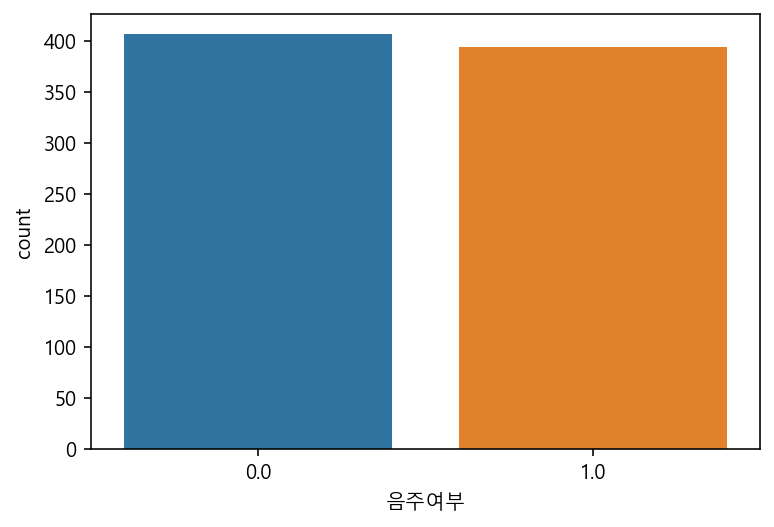

In [325]:
sns.countplot(data=train, x=label_name)

In [326]:
train[label_name]

592554    1.0
422127    0.0
283767    1.0
943108    0.0
111413    1.0
         ... 
623897    1.0
201128    0.0
101598    1.0
887672    1.0
128511    0.0
Name: 음주여부, Length: 800, dtype: float64

In [327]:
# 학습의 음주여부 비율
train[label_name].value_counts(normalize=True)

0.0    0.5075
1.0    0.4925
Name: 음주여부, dtype: float64

In [328]:
# 예측의 음주여부 비율
pd.Series(predictions).value_counts(normalize=True)

0.0    0.52
1.0    0.48
dtype: float64

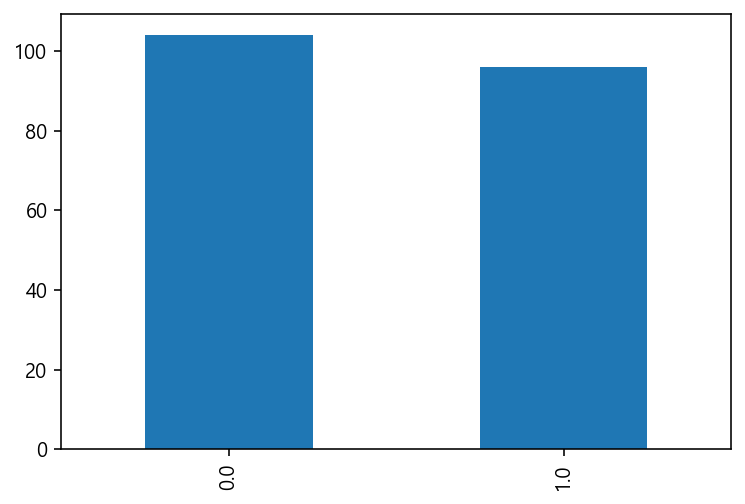

In [329]:
pd.Series(predictions).value_counts().plot.bar()

In [330]:
# 실제 데이터(y_test)의 음주여부

y_test.value_counts(normalize=True)

0.0    0.52
1.0    0.48
Name: 음주여부, dtype: float64

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* graphviz는 별도의 설치가 필요합니다.
* 다음의 사이트에서 graphviz를 다운로드 받아 설치 합니다. [Download](https://graphviz.gitlab.io/download/)


### 윈도우 
1) msi 파일을 다운로드 받아 설치하고 시스템 환경변수 Path에 아래의 경로를 추가합니다.(컴퓨터의 환경에 따라 경로가 다를 수도 있습니다.)
```
User - C:\Program Files (x86)\Graphviz2.38\bin
System - C:\Program Files (x86)\Graphviz2.38\bin\dot.exe
```

2) `conda install -c anaconda graphviz` 로 설치가 필요합니다. 아나콘다에서 그래프비즈를 사용할 수 있게 해주는 도구입니다.

1), 2)가 모두 만족되어야만 시각화를 할 수 있습니다.

* 위 과정을 다 했음에도 위 환경변수가 제대로 추가 되지 않았다면 아래의 코드를 주피터 노트북에 작성해 환경변수를 추가합니다.
(이 때도 아래의 홑따옴표 안에 있는 경로가 파일탐색기로 열었을 때 존재하는지 확인이 필요합니다.)
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
```

In [331]:
# graphviz 설치 없이 그리기
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

# plt.figure(figsize=(20, 15))
# tree = plot_tree(model, 
#                  feature_names=feature_names,
#                  class_names=["X", "O"],
#                  fontsize=10)

In [332]:
# # # graphviz 설치하고 그리기
# import graphviz

# dot_tree = export_graphviz(model,
#                           feature_names = feature_names, class_names=['X', 'O'])
# graphviz.Source(dot_tree)

In [333]:
# 피처의 중요도를 추출하기

mf = model.feature_importances_
mf

array([9.59169896e-04, 7.60502306e-02, 5.05058544e-02, 5.85409740e-02,
       2.10236473e-02, 4.75003192e-02, 2.94030455e-02, 7.60293297e-03,
       9.81012576e-06, 3.40379989e-04, 2.60515534e-02, 4.45702219e-02,
       5.04133602e-02, 6.18091431e-02, 6.99832366e-02, 4.43654313e-02,
       4.60201801e-02, 4.04541777e-02, 1.52010653e-03, 2.86535805e-02,
       3.04566435e-02, 3.75431045e-02, 8.27394852e-02, 1.21168981e-01,
       1.14081885e-02, 1.09062421e-02])

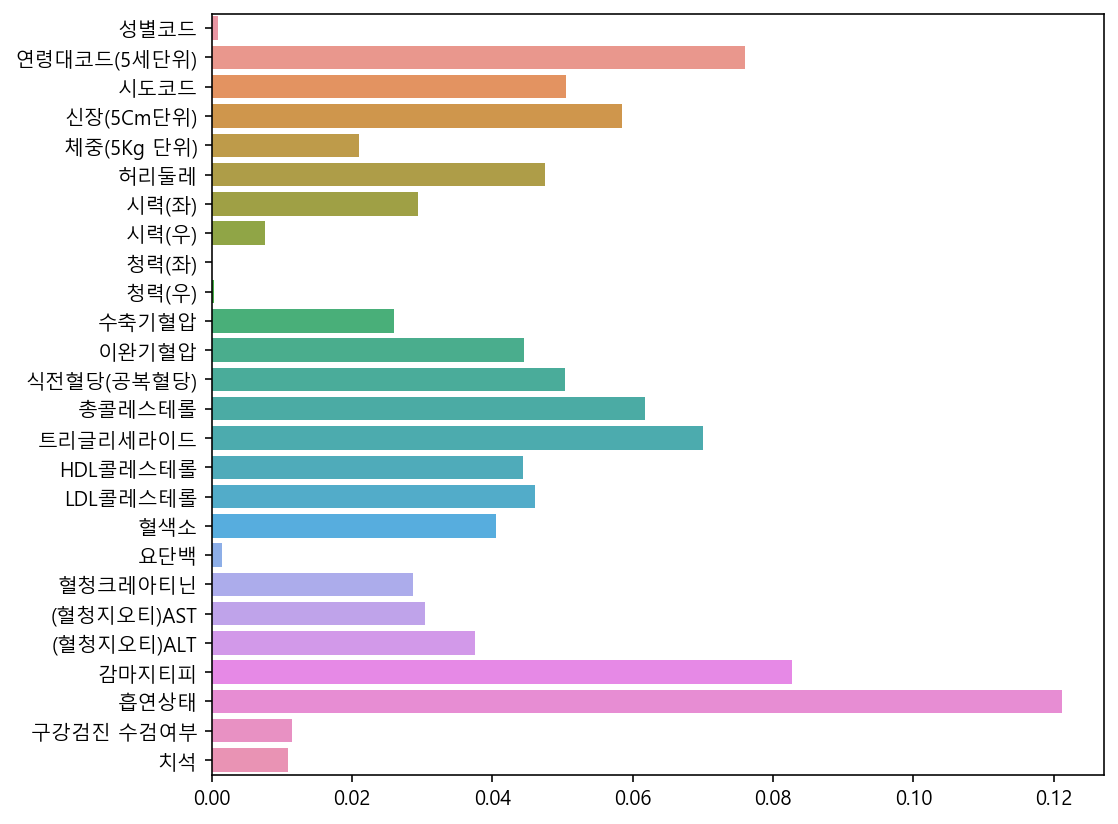

In [334]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(8,7))
sns.barplot(x=mf, y=feature_names)

## 정확도(Accuracy) 측정하기

In [335]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# diff_count 에 값을 넣어줍니다.

diff_count = y_test - predictions
diff_count.value_counts()

 0.0    126
-1.0     37
 1.0     37
Name: 음주여부, dtype: int64

In [336]:
diff_count_abs = abs(diff_count)
diff_count_sum = diff_count_abs.sum()
diff_count_sum

74.0

In [337]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count_sum) / len(y_test) * 100

63.0

In [338]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
# 사이킷런의 accuracy_score 를 가져와 계산합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

63.0

In [339]:
# model 의 score 로 점수를 계산합니다. model.score 에 문제와 정답을 넣어줍니다.

model.score(X_test, y_test) * 100

63.0


## 분류평가지표
* [F1 score - Wikipedia](https://en.wikipedia.org/wiki/F1_score)

## precision and recall
* [sklearn.metrics.f1_score — scikit-learn 0.22.1 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)


### F1 = 2 * (precision * recall) / (precision + recall)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="300">

In [340]:
# precision_score 를 계산합니다.

from sklearn.metrics import precision_score

precision_score(y_test, predictions)

0.6145833333333334

In [341]:
# recall_score 를 계산합니다.

from sklearn.metrics import recall_score

recall_score(y_test, predictions)

0.6145833333333334

In [342]:
# f1_score 를 계산합니다.

from sklearn.metrics import f1_score

f1_score(y_test, predictions)

0.6145833333333334

## confusion_matrix 그리기

In [343]:
# confusion_matrix 값을 가져옵니다. 가져온 값은 cm이라는 변수에 담아 재사용합니다.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

In [344]:
# flattened array
cm.ravel()

array([67, 37, 37, 59], dtype=int64)

In [345]:
# cm 값을 각각의 변수로 받습니다.
tn, fp, fn, tp  = cm.ravel()

In [346]:
# recall_score 를 직접 계산해 봅니다.
# TP / (TP + FN)

tp / (tp + fn)

0.6145833333333334

## 히트맵으로 confusion matrix 그리기

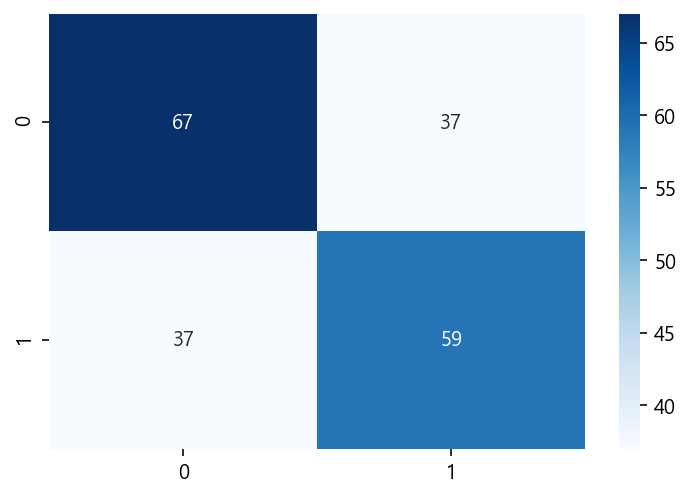

In [347]:
# heatmap 으로 cm 을 시각화 합니다. fmt='g' 로 소수점을 줄여줍니다.

sns.heatmap(cm, annot=True, cmap='Blues')

In [348]:
# normalize='true' 옵션을 사용해서 비율을 구하고 cmn 이라는 변수에 담아 재사용 합니다.

cmn = confusion_matrix(y_test, predictions, normalize='true')
cmn

array([[0.64423077, 0.35576923],
       [0.38541667, 0.61458333]])

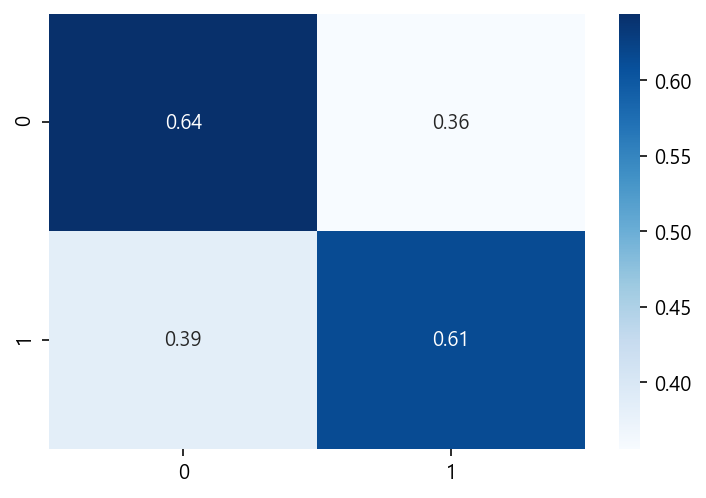

In [349]:
# heatmap 으로 cmn 을 시각화 합니다. fmt='g' 로 소수점을 줄여줍니다.

sns.heatmap(cmn, annot=True, cmap='Blues')

In [350]:
# classification_report 를 출력합니다.

from sklearn.metrics import classification_report

cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       104
         1.0       0.61      0.61      0.61        96

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



## 모델의 성능을 높이는 방법
* 데이터 전처리 : 피처 선택, 이상치나 오류값 조정해 주기
* 피처 스케일링(이상치, 첨도, 왜도 등)
* 모델 선택 
* 하이퍼파라메터 값 변경 등